<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/OLA_CaseStudy_Mariya_DSMLJune2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLA Driver Churn Prediction Using Ensemble Models

### **Objective**:
Based on the below attributes, OLA wants to find out if a drive would leave the company or not?  

*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, *   Monthly business acquired, grade, Income)

### **Import the Libraries**

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


In [4]:
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from simple_colors import *

### **Load the Data**

In [6]:
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

### **Statistical Summary** 

#### Basic information about the Data

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


#### Shape of the Data

In [8]:
# Shape of the data
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 19104 Rows and 14 Columns


In [9]:
data_df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [10]:
data_df.describe(include='all')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,NaN,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,9551.500000,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


### **Feature Engineering**

#### Drop the un-used/irrelevant column(s)

In [11]:
# Drop the Unnamed column 
data_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
data_df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [13]:
data_df.shape

(19104, 13)

In [14]:
data_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

##### **Observation**: There are 2381 drivers and the whole dataset is around these 2381 drivers. For further analysis we have to aggregate the data based on unique driver id.

In [15]:
data_df['Gender'].replace({0.0:"Male", 1.0:"Female"}, inplace=True)

In [16]:
data_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [17]:
# Value types and their unique counts of Categorical Variables
def display_unique_values(df):
  print("*** Unique Values count of Categorical Variables ***\n")
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(blue(col, ['bold']))
      print(df[col].value_counts().to_string(),'\n')

In [18]:
display_unique_values(data_df)

*** Unique Values count of Categorical Variables ***

Gender
Male      11074
Female     7978 

Education_Level
1    6864
2    6327
0    5913 

Joining Designation
1    9831
2    5955
3    2847
4     341
5     130 

Grade
2    6627
1    5202
3    4826
4    2144
5     305 

Quarterly Rating
1    7679
2    5553
3    3895
4    1977 



#### Restructure the data by Aggregating by Driver

In [19]:
agg_df = data_df.groupby(["Driver_ID"]).aggregate(
    {'MMM-YY':len, 
     "Age":max, 
     "City":np.unique, 
     "Education_Level":max, 
     "Income":np.mean, 
     "Dateofjoining":np.unique, 
     # "LastWorkingDate":last_value, 
     "Joining Designation":np.unique, 
     "Grade": np.mean, 
     "Total Business Value":sum, 
     "Quarterly Rating":np.mean 
     })

In [20]:
agg_df = agg_df.reset_index()

In [21]:
final_data = agg_df.rename(columns={
    "MMM-YY":"No_of_Records", 
    "Dateofjoining":"Date_of_joining", 
    "Joining Designation":"Joining_Designation", 
    "Total Business Value" : "Total_Business_Value", 
    "Quarterly Rating":"Quarterly_Rating"})

In [22]:
final_data = pd.merge(left = data_df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x: x[-1]), 
                    right = final_data, on = "Driver_ID", how="outer" )

In [23]:
final_data = pd.merge(left = data_df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x: x[-1]), 
                    right = final_data, on = "Driver_ID", how="outer" )

In [24]:
data = final_data.copy()

In [25]:
data['Gender'].value_counts()

Male      1380
Female     956
Name: Gender, dtype: int64

#### Create Target Variable (Driver Churn)

In [26]:
pd.Series(np.where(data["LastWorkingDate"].isna(),0,1)).value_counts()

1    1616
0     765
dtype: int64

In [27]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [28]:
y = data['Churn']

In [29]:
data['Churn'] = data['Churn'].apply(lambda y: 0 if y==0 else 1)

In [30]:
data['Churn'].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [31]:
data['Churn'].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Churn, dtype: float64

##### Class 1 is the drivers who churned - 68%
##### Class 0 is the drivers who did not churn - 32%
##### Data is imbalanced.

In [32]:
# Convert date columns to datetime types
data['Date_of_joining'] = pd.to_datetime(data["Date_of_joining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [33]:
data['Joining_Year'] = data["Date_of_joining"].dt.year

In [34]:
work_df = data.copy()

#### Missing Values

Missing Values in the Given Data Set


,Count,Percentage
LastWorkingDate,765,32.1
Gender,45,1.9
Driver_ID,0,0.0
No_of_Records,0,0.0
Age,0,0.0
City,0,0.0
Education_Level,0,0.0
Income,0,0.0
Date_of_joining,0,0.0
Joining_Designation,0,0.0


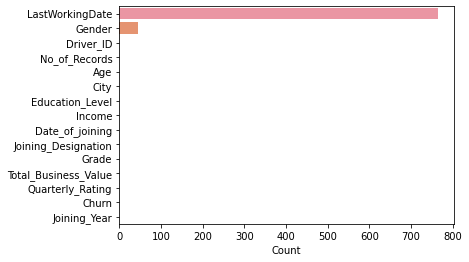

In [35]:
# Check for Missing Values
count = work_df.isna().sum()
missing_values_df = pd.DataFrame(count, columns=['Count'])
missing_values_df['Percentage'] = (work_df.isna().sum() / len(work_df) * 100).round(1)
missing_values_df.sort_values(by='Percentage', ascending=False, inplace=True)
print(blue("Missing Values in the Given Data Set", ['bold']))
display(missing_values_df)
sns.barplot(y=missing_values_df.index, x='Count', data=missing_values_df)
# plt.xlim(0, 2000)

In [36]:
# Sparcity of Missing Values
work_df.isna().sum(axis=1).value_counts()

0    1584
1     784
2      13
dtype: int64

In [37]:
import missingno as msng

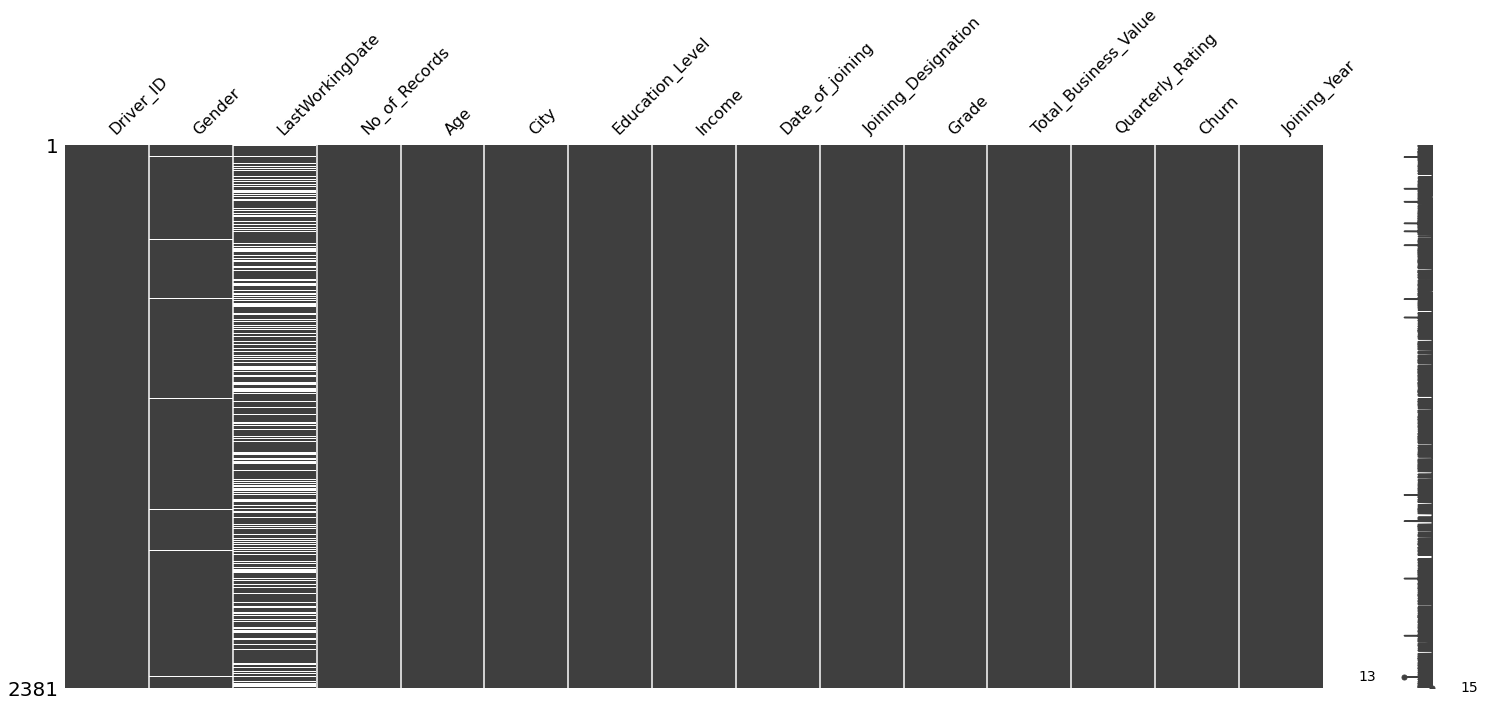

In [38]:
msng.matrix(work_df)
plt.show()

In [39]:
work_df.head()

,Driver_ID,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Joining_Year
0,1,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,2018
1,2,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,2020
2,4,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,2019
3,5,Male,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0,1,2019
4,6,Female,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6,0,2020


### Feature Engineering 2

In [40]:
# Check if app rating has increased for the driver
def app_rating_check(val):
  if len(val) >= 2:
    for i in range(len(val)):
      if val[-1] > val[-2]:
        return 1
      else:
        return 0
  else: 
    return 0

In [41]:
Quarterly_Rating_Increased = data_df.groupby('Driver_ID')['Quarterly Rating'].unique().apply(app_rating_check)

In [42]:
data = pd.merge(left = Quarterly_Rating_Increased, 
                   right = data,
                   on = "Driver_ID", 
                   how = "outer")

In [43]:
data['Quarterly_Rating_Increased'] = data['Quarterly Rating']

In [44]:
data.drop(['Quarterly Rating'], axis=1, inplace=True)

In [45]:
# Check if the monthly income has increased for the driver or not
def app_income_inc(val):
  if len(val) >= 2:
    for i in range(len(val)):
      if val[-1] > val[-2]:
        return 1
      else:
        return 0
  else:
    return 0

In [46]:
Income_Increased = data_df.groupby('Driver_ID')['Income'].unique().apply(app_income_inc)

In [47]:
data = pd.merge(left = data_df.groupby('Driver_ID')['Income'].unique().apply(app_income_inc).rename("Increased_Income"), 
                right = data, 
                on = 'Driver_ID', 
                how = 'outer')

In [48]:
data

,Driver_ID,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Joining_Year,Quarterly_Rating_Increased
0,1,0,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,2,0,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,4,0,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,5,0,Male,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,6,0,Female,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,Male,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,2785,0,Female,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,2786,0,Male,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,2787,0,Female,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [49]:
Mdata = data.copy()

In [50]:
Mdata['Gender'].replace({'Male': 0,
                         'Female': 1}, inplace=True)

In [51]:
Mdata.drop(['Driver_ID'], axis=1, inplace=True)

In [52]:
Mdata.isna().sum()

Increased_Income                0
Gender                         45
LastWorkingDate               765
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Income                          0
Date_of_joining                 0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Churn                           0
Joining_Year                    0
Quarterly_Rating_Increased      0
dtype: int64

In [53]:
Mdata

,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Joining_Year,Quarterly_Rating_Increased
0,0,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,0,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [54]:
Mdata['LastWorkingDate'] = Mdata['LastWorkingDate'].fillna(pd.to_datetime('2021-06-01'))

In [55]:
(Mdata['LastWorkingDate'] - Mdata['Date_of_joining'])

0        77 days
1       207 days
2       142 days
3        57 days
4       305 days
          ...   
2376   2056 days
2377     61 days
2378    418 days
2379    334 days
2380    358 days
Length: 2381, dtype: timedelta64[ns]

In [56]:
Mdata['Driver_tenure_days'] = (Mdata['LastWorkingDate'] - Mdata['Date_of_joining'])

In [168]:
Mdata['Driver_tenure_days'] = Mdata['Driver_tenure_days'].dt.days

In [58]:
Mdata.drop(['LastWorkingDate', 'Date_of_joining'], axis=1, inplace=True)

In [64]:
Mdata.drop(['Driver_tenure_days'], axis=1, inplace=True)

In [67]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Joining_Year,Quarterly_Rating_Increased
0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.000000,0,2020,0
2,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,1.500000,1,2018,0


In [68]:
Mdata['Grade'] = np.round(Mdata['Grade'])

In [70]:
Mdata['Quarterly_Rating'] = Mdata['Quarterly_Rating'].round()

In [73]:
cat_features = ['Increased_Income', 'Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade', 'Quarterly_Rating', 'Quarterly_Rating_Increased', 'Joining_Year']

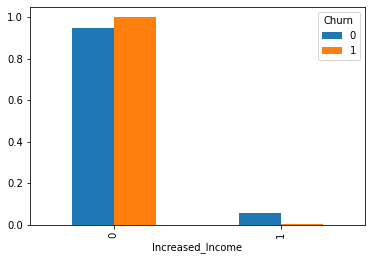

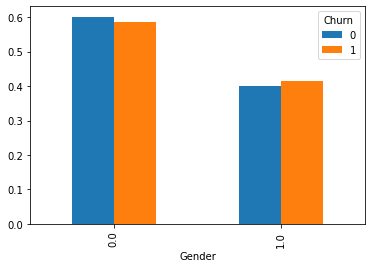

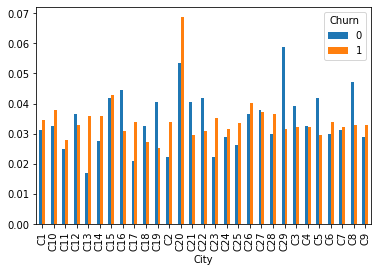

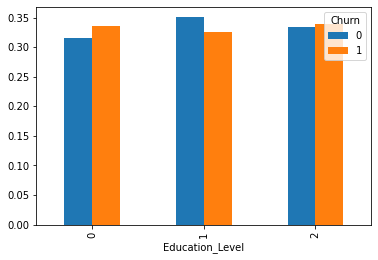

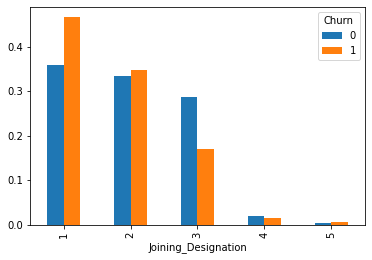

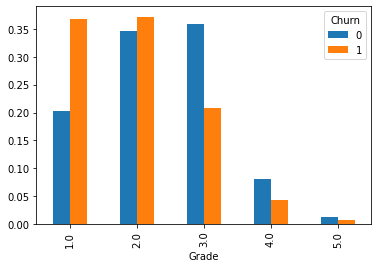

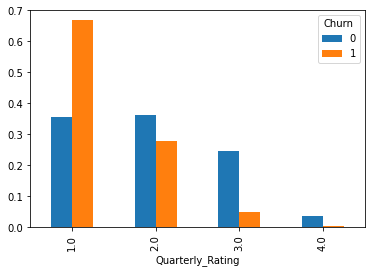

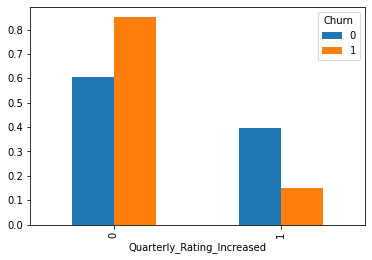

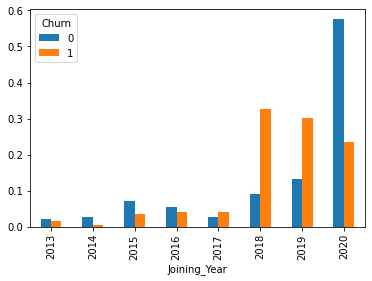

In [77]:
y = Mdata['Churn']
for col in cat_features:
  pd.crosstab(index=Mdata[col], columns=y, normalize='columns').plot(kind='bar')

In [78]:
Mdata.isna().sum()

Increased_Income               0
Gender                        45
No_of_Records                  0
Age                            0
City                           0
Education_Level                0
Income                         0
Joining_Designation            0
Grade                          0
Total_Business_Value           0
Quarterly_Rating               0
Churn                          0
Joining_Year                   0
Quarterly_Rating_Increased     0
dtype: int64

### Simple Imputer

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
imputer = SimpleImputer(strategy='most_frequent')

In [81]:
Mdata['Gender'] = imputer.fit_transform(X=Mdata['Gender'].values.reshape(-1,1), y=Mdata['Churn'].values.reshape(-1,1))

In [82]:
Mdata.isna().sum()

Increased_Income              0
Gender                        0
No_of_Records                 0
Age                           0
City                          0
Education_Level               0
Income                        0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
Joining_Year                  0
Quarterly_Rating_Increased    0
dtype: int64

In [83]:
Mdata['Gender'].value_counts()

0.0    1425
1.0     956
Name: Gender, dtype: int64

### Target Encoder

In [85]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


In [86]:
from category_encoders import TargetEncoder

In [87]:
TE = TargetEncoder()

In [88]:
Mdata['City'] = TE.fit_transform(X=Mdata['City'], y=Mdata['Churn'])

In [89]:
Mdata['Joining_Year'] = TE.fit_transform(X=Mdata['Joining_Year'], y=Mdata['Churn'])

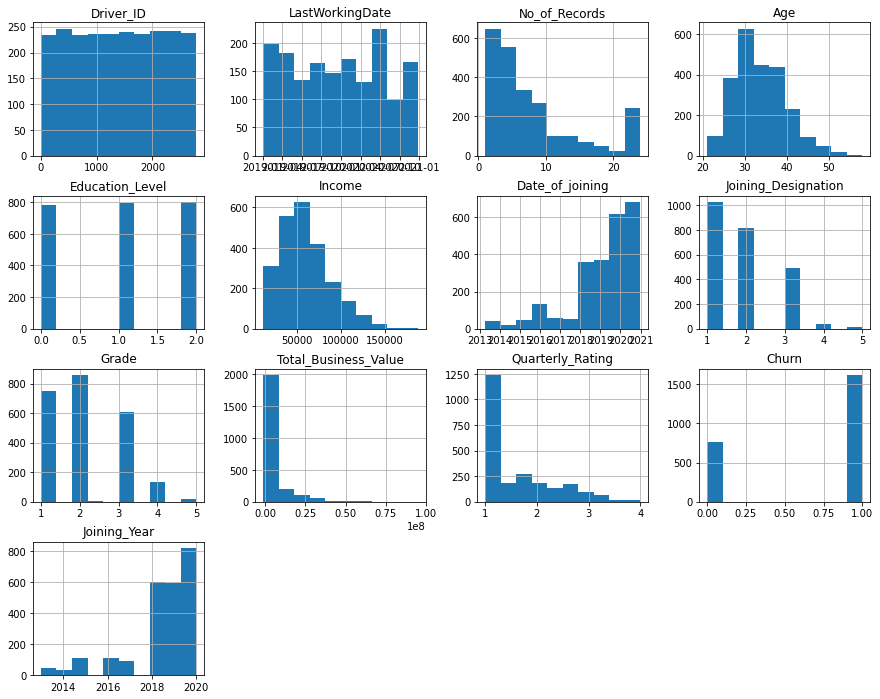

In [38]:
work_df.hist(figsize=(15,12))
plt.show()

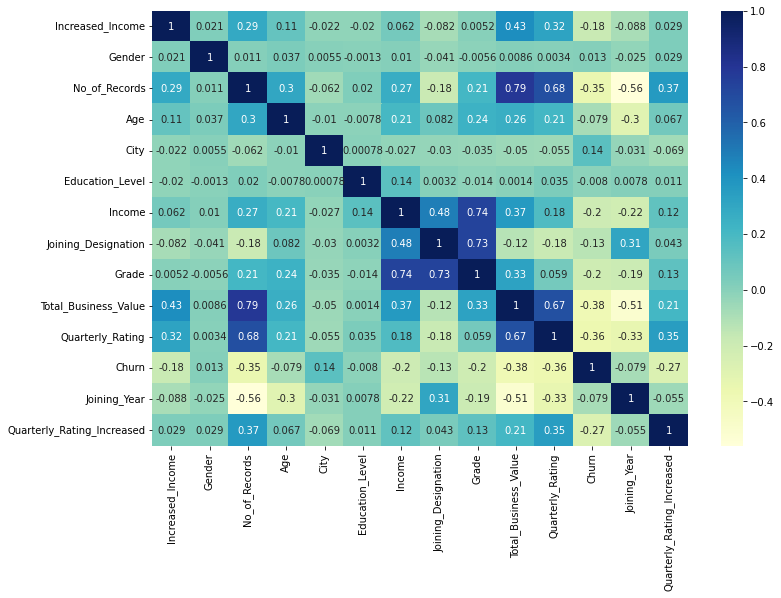

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(Mdata.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Segregate Independat (Input) and Dependant (Output) Variables

In [96]:
X = Mdata.drop(['Churn'], axis=1)
y = Mdata['Churn']

### KNN Imputer

In [97]:
from sklearn.impute import KNNImputer

In [98]:
imputer = KNNImputer(n_neighbors=5)

In [99]:
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [100]:
X

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Joining_Year,Quarterly_Rating_Increased
0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,2018.0,0.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,0.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,2019.0,0.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,2019.0,0.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,24.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,2015.0,1.0
2377,0.0,1.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,2020.0,0.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,2018.0,0.0
2379,0.0,1.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,2018.0,0.0


In [103]:
X.describe()

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Joining_Year,Quarterly_Rating_Increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,1.000000


#### train_test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Standard Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(X_train)

StandardScaler()

In [110]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
RF = RandomForestClassifier(n_estimators=100, 
                            criterion='entropy',
                            max_depth=10,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            max_features='sqrt',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=None,
                            verbose=0,
                            warm_start=False,
                            class_weight='balanced',
                            ccp_alpha=0.0085,
                            max_samples=None
                            )

In [114]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt')

In [116]:
RF.score(X_train, y_train),RF.score(X_test,y_test)

(0.8634453781512605, 0.8679245283018868)

In [117]:
RF.feature_importances_

array([0.00430695, 0.00036925, 0.29113593, 0.01356885, 0.01271012,
       0.00099096, 0.02141439, 0.02561265, 0.00996521, 0.16568606,
       0.06819586, 0.33816923, 0.04787455])

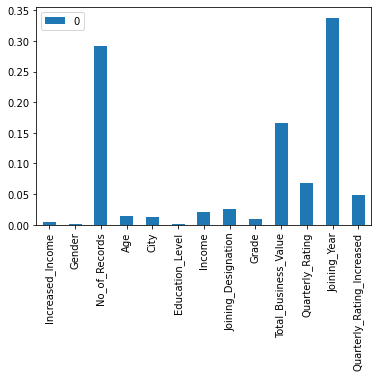

In [120]:
pd.DataFrame(data=RF.feature_importances_, index=X.columns).plot(kind='bar')
plt.show()

In [121]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [122]:
confusion_matrix(y_test, RF.predict(X_test))

array([[151,  11],
       [ 52, 263]])

In [123]:
confusion_matrix(y_train, RF.predict(X_train))

array([[ 561,   42],
       [ 218, 1083]])

In [124]:
f1_score(y_test, RF.predict(X_test)), f1_score(y_train, RF.predict(X_train))

(0.8930390492359932, 0.8928276999175596)

In [125]:
precision_score(y_test, RF.predict(X_test)), precision_score(y_train, RF.predict(X_train))

(0.9598540145985401, 0.9626666666666667)

In [126]:
recall_score(y_test, RF.predict(X_test)), recall_score(y_train, RF.predict(X_train))

(0.834920634920635, 0.8324365872405841)

### GridSearchCV on Random Forest Classifier

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [128]:
params = {'max_depth': [7,10,15],
          'n_estimators': [100, 200, 300, 400],
          'max_features': [4, 7, 10],
          'ccp_alpha': [0.0005, 0.00075, 0.001]
          }

In [131]:
RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = params,
    scoring = 'accuracy',
    n_jobs = -1, 
    refit = True,
    cv = 3, 
    pre_dispatch = '2*n_jobs',
    return_train_score = False
)


In [133]:
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [135]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.00075, max_depth=15, max_features=7,
                       n_estimators=300)

In [136]:
grid_search.best_score_

0.8870902572509668

In [137]:
grid_search.best_params_

{'ccp_alpha': 0.00075, 'max_depth': 15, 'max_features': 7, 'n_estimators': 300}

In [138]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
                           criterion='entropy',
                          max_depth = 7,
                          min_samples_split = 2, 
                          min_samples_leaf = 1, 

                          class_weight = 'balanced',
                          ccp_alpha = 0.0001,
                          max_samples = None 
                            )

In [139]:
RF.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [140]:
RF.score(X_train, y_train), RF.score(X_test, y_test)

(0.9080882352941176, 0.8825995807127882)

In [141]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [142]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)

(0.9096774193548388, 0.9308573686290005)

In [143]:
precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)

(0.9245901639344263, 0.9577235772357724)

In [144]:
recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)

(0.8952380952380953, 0.9054573405073021)

### Bagging Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [148]:
bagging_classifier_model = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth=7, class_weight='balanced'),
                                             n_estimators=50,
                                             max_samples=1.0,
                                             max_features=1.0, 
                                             bootstrap=True,
                                             bootstrap_features=False,
                                             oob_score=False,
                                             warm_start = False,
                                             n_jobs = None, 
                                             random_state = None, 
                                             verbose = 0,
                                             )

In [149]:
bagging_classifier_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [150]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [151]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [152]:
confusion_matrix(y_test, y_test_pred)

array([[142,  20],
       [ 42, 273]])

In [153]:
confusion_matrix(y_train, y_train_pred)

array([[ 560,   43],
       [ 122, 1179]])

In [154]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)

(0.8980263157894738, 0.9346016646848989)

In [155]:
precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)

(0.931740614334471, 0.9648117839607201)

In [156]:
recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)

(0.8666666666666667, 0.9062259800153728)

In [157]:
bagging_classifier_model.score(X_test, y_test)

0.870020964360587

In [159]:
bagging_classifier_model.score(X_train, y_train)

0.9133403361344538

In [160]:
from xgboost import XGBClassifier

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [2, 4, 6, 10],
          'n_estimators': [100, 200, 300, 400]
          }

grid_search = GridSearchCV(
    estimator = XGBClassifier(), 
    param_grid = params, 
    scoring = 'accuracy',
    n_jobs = -1, 
    refit = True, 
    cv = 3, 
    pre_dispatch = '2*n_jobs',
    return_train_score=False
)

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [162]:
grid_search.best_estimator_

XGBClassifier(max_depth=2)

In [163]:
grid_search.best_score_

0.8849905197181583

In [164]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [165]:
xgb = XGBClassifier(n_estimators=100, max_depth=2)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=2)

In [166]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [167]:
confusion_matrix(y_test, y_test_pred)

array([[121,  41],
       [ 18, 297]])

In [168]:
confusion_matrix(y_train, y_train_pred)

array([[ 491,  112],
       [  85, 1216]])

In [169]:
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.8965336134453782, 0.8763102725366876)

In [170]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)

(0.9096477794793262, 0.9250665652339293)

In [171]:
recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)

(0.9428571428571428, 0.9346656418139893)

In [172]:
precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)

(0.878698224852071, 0.9156626506024096)

In [173]:
xgb.feature_importances_

array([0.        , 0.        , 0.20129615, 0.01278642, 0.02517729,
       0.01437675, 0.01683749, 0.02346249, 0.01400838, 0.0713435 ,
       0.26491013, 0.30614272, 0.04965872], dtype=float32)

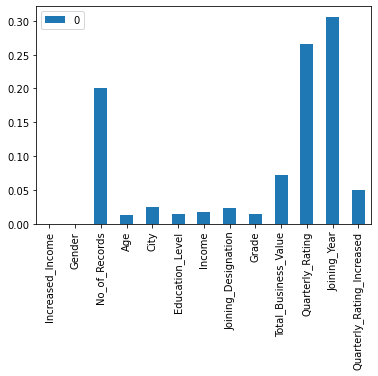

In [174]:
pd.DataFrame(data=xgb.feature_importances_, index=X.columns).plot(kind='bar')

### Gradient Boost Classifier

In [208]:
def GradientBoostClassifier(X, y):
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, auc, recall_score, precision_score
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

  gbs_cl = GradientBoostingClassifier()
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  gbs_cl.fit(X_train, y_train)
  y_pred = gbs_cl.predict(X_test)
  prob = gbs_cl.predict_proba(X_test)
  cm = confusion_matrix(y_test, y_pred)

  print("Train Score:", gbs_cl.score(X_train, y_train), '\n')
  print("Test Score:", gbs_cl.score(X_test, y_test), '\n')
  print("Accuracy Score:", accuracy_score(y_test, y_pred), '\n')
  print(cm, "\n\n *** Confusion Matrix ***", '\n')
  print("ROC-AUC Score Test Dataset:", roc_auc_score(y_test, prob[:, 1]), '\n')
  print("Precision Score Test Dataset:", precision_score(y_test, y_pred), '\n')
  print("Recall Score Test Dataset:", recall_score(y_test, y_pred), '\n')
  print("F1 Scorre Test Dataset:", f1_score(y_test, y_pred), '\n')

  return (prob[:,1], y_test)

In [213]:
probs, y_test = GradientBoostClassifier(X, y)

Train Score: 0.914390756302521 

Test Score: 0.8909853249475891 

Accuracy Score: 0.8909853249475891 

[[125  23]
 [ 29 300]] 

 *** Confusion Matrix *** 

ROC-AUC Score Test Dataset: 0.9450731126263041 

Precision Score Test Dataset: 0.9287925696594427 

Recall Score Test Dataset: 0.9118541033434651 

F1 Scorre Test Dataset: 0.9202453987730062 



In [214]:
def plot_pre_curve(y_test, probs):
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, probs)
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  plt.plot(recall, precision, marker='.')
  plt.title("Precision Recall Curve")
  plt.xlabel('Recall')
  plt.ylabel("Precision")
  plt.show()

In [215]:
def plot_roc(y_test, prob):
  from sklearn.metrics import roc_curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  plt.plot([0, 1], [0,1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

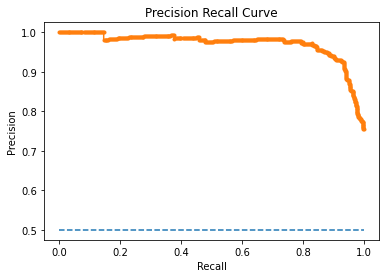

In [216]:
plot_pre_curve(y_test, probs)

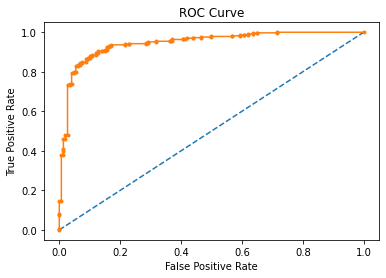

In [217]:
plot_roc(y_test, probs)

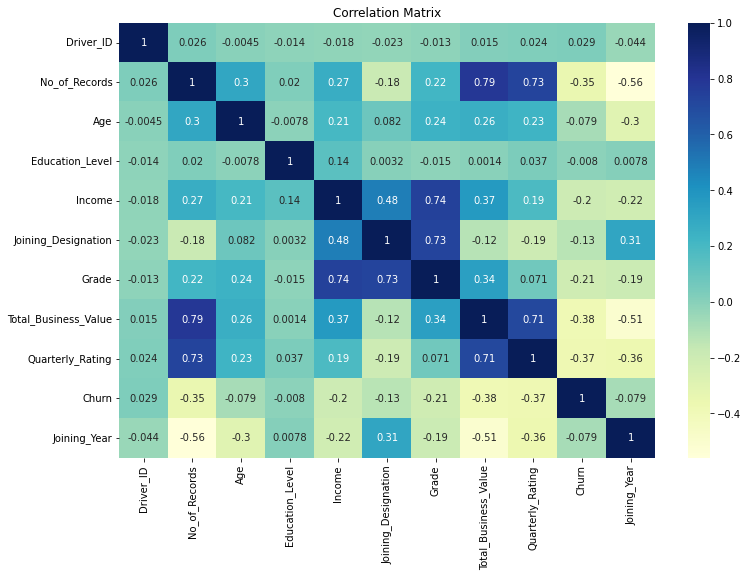

In [39]:
corr = work_df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.title("Correlation Matrix")
plt.show()

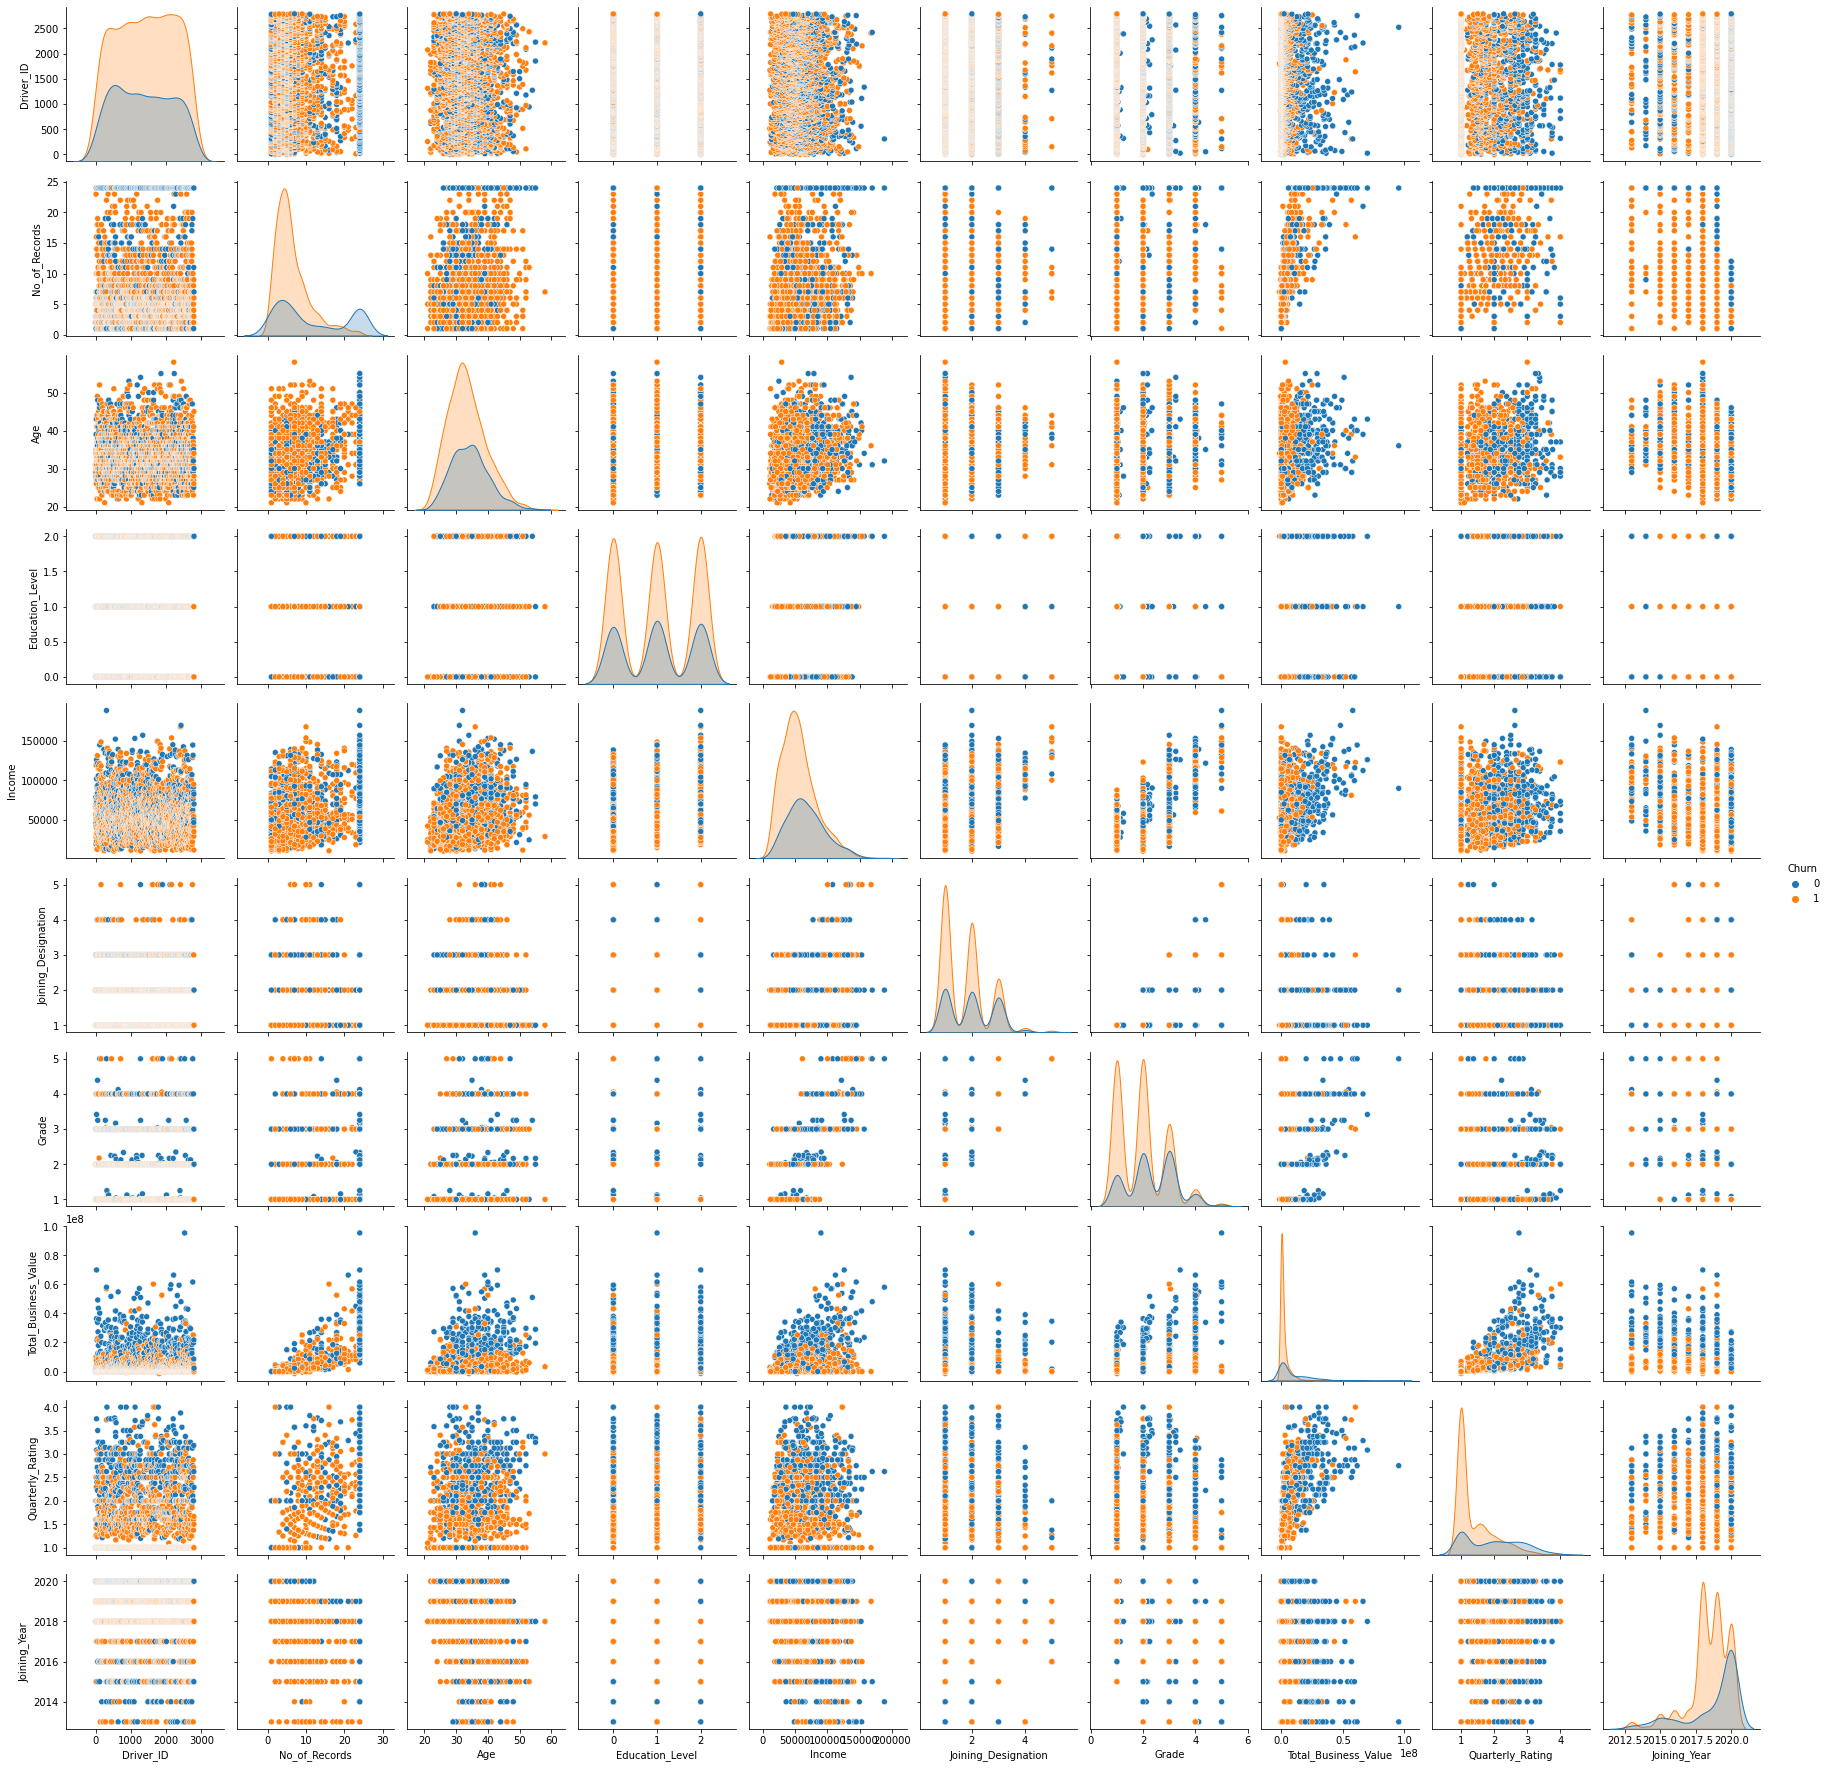

In [40]:
sns.pairplot(work_df, hue='Churn')
plt.show()